#1. Vector, Matrix and Tensor

##1) 벡터, 행렬, 텐서 그림으로 이해하기

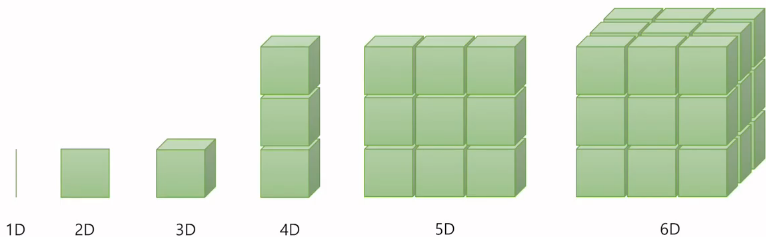

차원이 없는 값 : 스칼라 (위 그림에는 없음)

1D : Vector

2D : Matrix

3D : Tensor

3D 이상의 Tensor는 다차원 행렬 or 배열로 간주

1D, 2D도 Tensor라고 함.
Vector = 1D Tensor, Matrix = 2D Tensor

##2) PyTorch Tensor Shape Convention

* 2D Tensor(Typical Simple setting)

  |t| = (Batch size, dim)

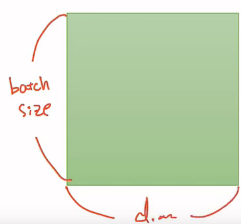

  훈련 데이터 하나의 크기를 256이라 가정

  [3, 1, 2, 5, ...]

  숫자의 나열이 256의 길이로 있음.

  훈련데이터 하나의 벡터 차원(dim) = 256

  훈련데이터 개수 3000개면 전체 훈련 데이터 크기는 3000 x 256

  보통 덩어리로 처리. 3000개에서 64개씩 꺼내서 처리한다고 하면 batch size 64

  2D Tesor size = (batch size x dim) = 64 x 256

* 3D Tensor(Typical Computer Vision)

  |t| = (batch size, width, height)

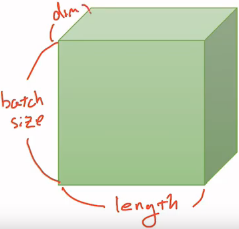

* NLP 분야의 3D 테너 예제로 이해하기

In [ ]:
[[나는 사과를 좋아해], [나는 바나나를 좋아해], [나는 사과를 싫어해], [나는 바나나를 싫어해]]

컴퓨터는 'I like apple'의 단어가 1개인지 3개인지 이해하지 못함.

단어별로 나눠줘야 함.

In [ ]:
[['나는', '사과를', '좋아해'], ['나는', '바나나를', '좋아해'], ['나는', '사과를', '싫어해'], ['나는', '바나나를', '싫어해']]

In [ ]:
'나는' = [0.1, 0.2, 0.9]
'사과를' = [0.3, 0.5, 0.1]
'바나나를' = [0.3, 0.5, 0.2]
'좋아해' = [0.7, 0.6, 0.5]
'싫어해' = [0.5, 0.6, 0.7]

훈련 데이터는 4 × 3 × 3의 크기를 가지는 3D 텐서

In [ ]:
[[[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.7, 0.6, 0.5]],
 [[0.1, 0.2, 0.9], [0.3, 0.5, 0.2], [0.7, 0.6, 0.5]],
 [[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.5, 0.6, 0.7]],
 [[0.1, 0.2, 0.9], [0.3, 0.5, 0.2], [0.5, 0.6, 0.7]]]

batch size를 2로 하면 아래와 같음

In [ ]:
첫번째 배치 #1
[[[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.7, 0.6, 0.5]],
 [[0.1, 0.2, 0.9], [0.3, 0.5, 0.2], [0.7, 0.6, 0.5]]]

두번째 배치 #2
[[[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.5, 0.6, 0.7]],
 [[0.1, 0.2, 0.9], [0.3, 0.5, 0.2], [0.5, 0.6, 0.7]]]

컴퓨터는 배치 단위로 가져가서 연산 수행

현재 각 배치의 텐서의 크기는 2 x 3 x 3
(batch size, 문장 길이, 단어 벡터의 차원)

#2. 넘파이로 텐서 만들기(벡터와 행렬 만들기)

In [56]:
import numpy as np

##1) 1D with Numpy

In [2]:
t = np.array([0., 1., 2., 3., 4., 5., 6.])
print(t)

[0. 1. 2. 3. 4. 5. 6.]


In [4]:
print('Rank of t:', t.ndim)
print('Shape of t:', t.shape)

Rank of t: 1
Shape of t: (7,)


In [5]:
print('t[0] t[1] t[-1] = ', t[0], t[1], t[-1])

t[0] t[1] t[-1] =  0.0 1.0 6.0


In [6]:
print('t[2:5] t[4:-1] =', t[2:5], t[4:-1])

t[2:5] t[4:-1] = [2. 3. 4.] [4. 5.]


In [7]:
print('t[:2] t[3:] = ', t[:2], t[3:])

t[:2] t[3:] =  [0. 1.] [3. 4. 5. 6.]


##2) 2D with Numpy

In [8]:
t = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.], [10., 11., 12.]])
print(t)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


In [10]:
print('Rank of t:', t.ndim)
print('Shape of t:', t.shape)

Rank of t: 2
Shape of t: (4, 3)


#3. PyTorch Tensor Allocation

In [57]:
import torch

##1) 1D with PyTorch

In [12]:
t = torch.FloatTensor([0., 1., 2., 3., 4., 5., 6.])
print(t)

tensor([0., 1., 2., 3., 4., 5., 6.])


In [13]:
print(t.dim()) # rank (현재 탠서의 차원)
print(t.shape) #shape
print(t.size()) #shape

1
torch.Size([7])
torch.Size([7])


In [14]:
print(t[0], t[1], t[-1])
print(t[2:5], t[4:-1])
print(t[:2], t[3:])

tensor(0.) tensor(1.) tensor(6.)
tensor([2., 3., 4.]) tensor([4., 5.])
tensor([0., 1.]) tensor([3., 4., 5., 6.])


##2) 2D with PyTorch

In [16]:
t = torch.FloatTensor([[1., 2., 3.],
                       [4., 5., 6.],
                       [7., 8., 9.],
                       [10., 11., 12.]
                       ])
print(t)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])


In [17]:
print(t.dim())
print(t.size())

2
torch.Size([4, 3])


In [20]:
print(t[:, 1])
print(t[:, 1].size())

tensor([ 2.,  5.,  8., 11.])
torch.Size([4])


In [21]:
print(t[:, :-1])

tensor([[ 1.,  2.],
        [ 4.,  5.],
        [ 7.,  8.],
        [10., 11.]])


##3) Broadcasting

In [22]:
m1 = torch.FloatTensor([[3, 3]])
m2 = torch.FloatTensor([[2, 2]])
print(m1 + m2)

tensor([[5., 5.]])


In [23]:
#vector + scarlar
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([3]) # [3] -> [3, 3]
print(m1 + m2)

tensor([[4., 5.]])


In [24]:
# 2 x 1 vector + 1 x 2 vector
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([[3], [4]])
print(m1 + m2)

tensor([[4., 5.],
        [5., 6.]])


-> 두 벡터의 크기를 (2, 2)로 변경하여 덧셈

[1, 2]

==> [[1, 2],

     [1, 2]]

[3]

[4]

==> [[3, 3],

     [4, 4]]


### **사용자의 입장에서 에러가 발생하지 않아 원하는 결과가 나오지 않아도 어디서 문제가 발생했는지 찾기 굉장히 어려우니 주의**


##4) 자주 사용되는 기능들
###(1) Matrix Multiplication VS Multiplication

.matmul()

.mul()

In [25]:
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1 :', m1.shape)
print('Shape of Matrix 2 :', m2.shape)
print(m1.matmul(m2))

Shape of Matrix 1 : torch.Size([2, 2])
Shape of Matrix 2 : torch.Size([2, 1])
tensor([[ 5.],
        [11.]])


element-wise 곱셈은 동일한 크기의 행렬이 동일한 위치에 있는 원소끼리 곱하는 것

In [28]:
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape)
print('Shape of Matrix 2: ', m2.shape)
print(m1 * m2)
print(m1.mul(m2))

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])


m1 행렬의 크기는 (2, 2) m2 행렬의 크기는 (2, 1)

element-wise 곱셈을 수행하면, 두 행렬의 크기는 브로드캐스팅이 된 후에 곱셈이 수행

[1]

[2]

==> [[1, 1],

      [2, 2]]


###(2) Mean

In [29]:
t = torch.FloatTensor([1, 2])
print(t.mean())

tensor(1.5000)


In [30]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [31]:
print(t.mean())

tensor(2.5000)


In [32]:
print(t.mean(dim = 0))

tensor([2., 3.])


dim = 0, 즉 행렬에서 첫 번째 차원은 '행'을 의미.

인자로 dim을 준다면 해당 차원을 제거한다는 의미.

다시말해, 행렬에서 '열'만 남긴다는 뜻

기존 행렬의 크기는 (2, 2)였지만 이를 수행하면 열의 차원만 보존되면서 (1, 2)가 된다. (2,)와 같으며 벡터임.

###실제 연산 과정

t.mean(dim=0)은 입력에서 첫번째 차원을 제거한다.

[[1., 2.],

 [3., 4.]]

1과 3의 평균을 구하고, 2와 4의 평균을 구한다.

결과 ==> [2., 3.]

In [33]:
print(t.mean(dim = 1))

tensor([1.5000, 3.5000])


###실제 연산 결과는 (2 × 1)

[1. 5]

[3. 5]

하지만 (2 × 1)은 결국 1차원이므로 (1 × 2)와 같이 표현되면서 위와 같이 [1.5, 3.5]로 출력

In [35]:
print(t.mean(dim = -1)) # 마지막 차원을 제거한다는 의미이고, 결국 열의 차원을 제거한다는 의미

tensor([1.5000, 3.5000])


###(3) Sum

In [36]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [37]:
print(t.sum())
print(t.sum(dim = 0))
print(t.sum(dim = 1))
print(t.sum(dim = -1))

tensor(10.)
tensor([4., 6.])
tensor([3., 7.])
tensor([3., 7.])


###(4) Max and ArgMax

Max는 원소의 최대값을 리턴하고 ArgMax는 최대값을 가진 인덱스 리턴

In [38]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [39]:
print(t.max(dim = 0))

torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))


###[1, 1]도 출력되는 이유 : max에 dim 인자를 주면 argmax도 함께 리턴하는 특징 때문

[[1, 2],

 [3, 4]]

첫번째 열에서 0번 인덱스는 1, 1번 인덱스는 3입니다.

두번째 열에서 0번 인덱스는 2, 1번 인덱스는 4입니다.

다시 말해 3과 4의 인덱스는 [1, 1]입니다.


In [40]:
print('Max :', t.max(dim=0)[0])
print('Argmax :', t.max(dim=0)[1])

Max : tensor([3., 4.])
Argmax : tensor([1, 1])


In [41]:
print(t.max(dim=1))
print(t.max(dim=-1))

torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))
torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))


#4. View

Numpy에서의 Reshape와 같은 역할

원소의 수를 유지하면서 텐서의 크기 변경

In [45]:
t = np.array([[[0, 1, 2],
               [3, 4, 5]],
              [[6, 7, 8],
               [9, 10, 11]]])

ft = torch.FloatTensor(t)

In [46]:
print(ft.shape)

torch.Size([2, 2, 3])


##1) 3차원 텐서에서 2차원 텐서로 변경

In [48]:
print(ft.view([-1, 3])) # ft라는 텐서를 (?, 3)의 크기로 변경
print(ft.view([-1, 3]).shape)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


view([-1, 3])이 가지는 의미

-1 : 첫 번째 차원은 사용자가 잘 모르겠으니 파이토치가 알아서 해라

3 : 두 번째 차원의 길이는 3을 가지도록 해라

**-> (?, 3)의 크기로 변경하라는 의미**

내부적으로 크기 변환은 (2, 2, 3) -> (2 × 2, 3) -> (4, 3)

- view는 기본적으로 변경 전과 변경 후의 텐서 안의 원소의 개수가 유지되어야 함
- 파이토치의 view는 사이즈가 -1로 설정되면 다른 차원으로부터 해당 값을 유추

In [49]:
print(ft.view([-1, 1, 3]))
print(ft.view([-1, 1, 3]).shape)

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


#5. Squeeze

1인 차원 제거

In [50]:
ft = torch.FloatTensor([[0], [1], [2]])
print(ft)
print(ft.shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [52]:
print(ft.squeeze())
print(ft.squeeze().shape)

tensor([0., 1., 2.])
torch.Size([3])


#6. Unsqueeze

특정 위치에 1인 차원 추가

In [58]:
ft = torch.Tensor([0, 1, 2])
print(ft.shape)

torch.Size([3])


현재는 차원이 1개인 1차원 벡터

첫 번째 차원에 1인 차원을 추가하고자 하면, 첫 번째 차원의 인덱스를 의미하는 숫자 0을 인자로 넣으면 됨.

In [59]:
print(ft.unsqueeze(0))
print(ft.unsqueeze(0).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


view로도 구현 가능. (1, -1) 사용

In [55]:
print(ft.view(1, -1))
print(ft.view(1, -1).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [60]:
print(ft.unsqueeze(1))
print(ft.unsqueeze(1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [61]:
print(ft.unsqueeze(-1))
print(ft.unsqueeze(-1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


#7. Type Casting

자료형을 변환하는 것

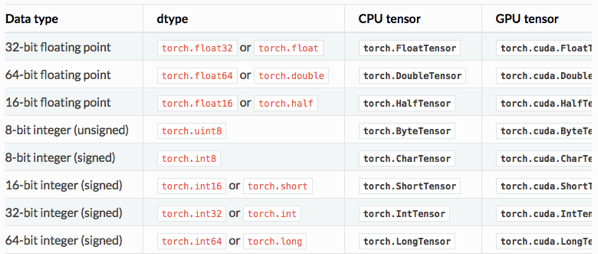

In [62]:
lt = torch.LongTensor([1, 2, 3, 4])
print(lt)

tensor([1, 2, 3, 4])


In [63]:
print(lt.float())

tensor([1., 2., 3., 4.])


In [64]:
bt = torch.ByteTensor([True, False, False, True])
print(bt)

tensor([1, 0, 0, 1], dtype=torch.uint8)


In [65]:
print(bt.long())
print(bt.float())

tensor([1, 0, 0, 1])
tensor([1., 0., 0., 1.])


#8. Concatenate

텐서 연결하기

In [66]:
x = torch.FloatTensor([[1, 2], [3, 4]])
y = torch.FloatTensor([[5, 6], [7, 8]])

In [67]:
print(torch.cat([x, y], dim = 0)) # dim = 0 첫 번째 차원을 늘리라는 의미

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])


In [68]:
print(torch.cat([x, y], dim = 1))

tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


#9. Stacking

In [69]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

In [70]:
print(torch.stack([x, y, z]))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


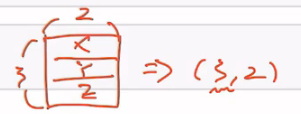

In [71]:
print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


In [72]:
print(torch.stack([x, y, z], dim = 1)) #두 번째 차원이 증가하도록 쌓으라는 의미

tensor([[1., 2., 3.],
        [4., 5., 6.]])


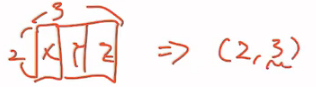

#10. ones_like와 zeros_like

0으로 채워진 텐서와 1로 채워진 텐서

In [73]:
x = torch.FloatTensor([[0, 1, 2], [2, 1, 0]])
print(x)

tensor([[0., 1., 2.],
        [2., 1., 0.]])


In [74]:
print(torch.ones_like(x)) #입력 텐서와 크기를 동일하게 하면서 값을 1로 채우기

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [75]:
print(torch.zeros_like(x)) # 입력 텐서와 크기를 동일하게 하면서 값을 0으로 채우기

tensor([[0., 0., 0.],
        [0., 0., 0.]])


#11. In-place Operation

In [78]:
x = torch.FloatTensor([[1, 2], [3, 4]])

In [79]:
print(x.mul(2.))
print(x)

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])


In [80]:
print(x.mul_(2.))
print(x)

tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])
